In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 1. Inspecting the data

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Comparing survival rate across various categorical variables

In [62]:
for col in train_data.columns[[2,4,6,7,11]]:
    print(train_data.groupby(col,as_index=False)["Survived"].mean(),"\n\n")

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 


      Sex  Survived
0  female  0.742038
1    male  0.188908 


   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 


   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000 


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 




### Comparing survival rate across age groups

Text(0, 0.5, 'Survival Rate')

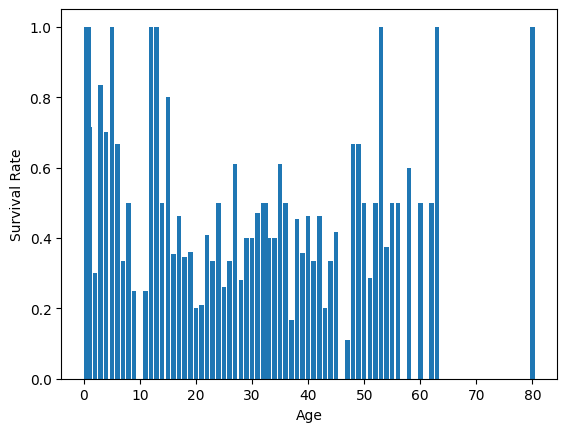

In [63]:
average_survival_rate_per_age = train_data.groupby("Age",as_index=False)["Survived"].mean()
plt.bar(average_survival_rate_per_age['Age'],average_survival_rate_per_age['Survived'])

plt.xlabel('Age')
plt.ylabel('Survival Rate')

### Comparing survival rate across fare groups

Text(0, 0.5, 'Survival Rate')

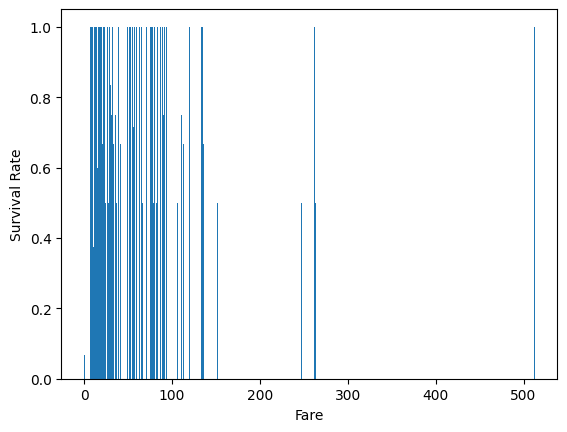

In [64]:
average_survival_rate_per_fare_group = train_data.groupby("Fare",as_index=False)["Survived"].mean()
plt.bar(average_survival_rate_per_fare_group['Fare'],average_survival_rate_per_fare_group['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survival Rate')

# 2. Training a simple random forest

In [65]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first=True)
test_data['is_male'] = pd.get_dummies(test_data['Sex'],drop_first=True)

In [66]:
features = ['Age', 'is_male', 'Fare', 'Pclass', 'SibSp', 'Parch']
X_train = train_data[features].fillna(train_data.mean())
X_test = test_data[features]

C:\Users\Amin\AppData\Local\Temp\ipykernel_1904\734321517.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train = train_data[features].fillna(train_data.mean())


In [70]:
y = train_data["Survived"]

model = RandomForestClassifier(n_estimators=10000, max_depth=5, random_state=1)
model.fit(X_train, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission6.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


   Feature  Importance
1  is_male    0.468937
2     Fare    0.180382
3   Pclass    0.150510
0      Age    0.112697
4    SibSp    0.052979
5    Parch    0.034495


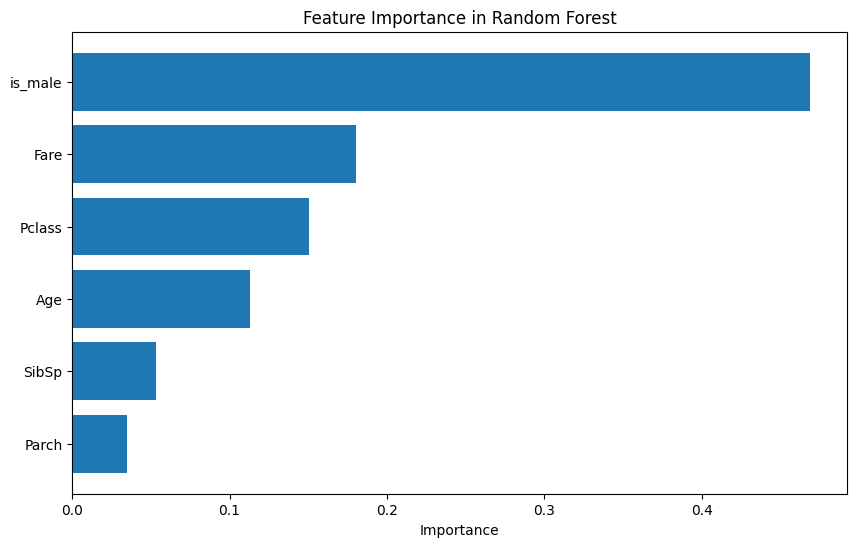

In [ ]:
# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance_df)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Highest on top
plt.show()